In [ ]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers import Dense, Embedding,  SpatialDropout1D,Bidirectional,LSTM

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt

In [ ]:
from keras import regularizers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [ ]:
import re

df=pd.read_excel("dataset.xlsx")

In [ ]:
df['polarity'].str.lower()


0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
14994    negative
14995    negative
14996    negative
14997    negative
14998    negative
Name: polarity, Length: 14999, dtype: object

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
df["clean_review"] = df["review"].apply(lambda text: remove_punctuation(text))
df.head()

,review,polarity,clean_review
0,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,positive,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...
1,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,positive,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...
2,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,positive,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...
3,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...,positive,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...
4,চলতে চলতে ই-রিডিংয়ের জন্য দুর্দান্ত এবং হালকা...,positive,চলতে চলতে ইরিডিংয়ের জন্য দুর্দান্ত এবং হালকা ...


In [ ]:
digit_to_remove=['১','২','৩','৪','৫','৬','৭','৮','৯','০']


In [ ]:
def remove_digits(text):
    """custom function to remove the stopwords"""
    return ''.join(c for c in text if  not  c.isdigit())
df["no_digits"] = df["clean_review"].apply(lambda text: remove_digits(text))
df.head()

,review,polarity,clean_review,no_digits
0,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,positive,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...
1,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,positive,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...
2,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,positive,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...
3,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...,positive,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...,এই অ্যামাজন ফায়ার ইঞ্চি ট্যাবলেটটি সঠিক আকার...
4,চলতে চলতে ই-রিডিংয়ের জন্য দুর্দান্ত এবং হালকা...,positive,চলতে চলতে ইরিডিংয়ের জন্য দুর্দান্ত এবং হালকা ...,চলতে চলতে ইরিডিংয়ের জন্য দুর্দান্ত এবং হালকা ...


In [ ]:
bangla_stop_word =['অবশ্য','অনেক','অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপন', 'আবার', 'আমরা',  'আগে', 'আমাকে', 'আমাদের', 'আমার', 'আমি','আরও','আদ্যভাগে','এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস','এত','এতে','এসে', 'একে', 'এ', 'ঐ', 'ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক','কয়েকটি','করবে', 'করলেন', 'করার', 'কারও', 'করাকরি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে',  'করেছি','করেন', 'করবেন','করায়','করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই','কাউকে','কেন','কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্রে', 'খুব', 'গুলি', 'গিয়ে', 'গিয়েছে', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'ছাড়া', 'ছাড়াও', 'ছিলেন', 'ছিল', 'জন্য', 'জানা', 'ঠিক','তিনি','তিন', 'ঐ', 'তিনিও', 'তখন', 'তবে','তবু', 'তাঁদের', 'তাঁহারা', 'তাঁরা', 'তাঁর', 'তাঁকে', 'তাই', 'তেমন', 'তাকে','তাহা', 'তাহাতে', 'তাহার', 'তাদের', 'তারপর', 'তারা', 'তারৈ', 'তার', 'তাহলে', 'তিনি',
 'তা','তাও', 'তাতে', 'তো', 'ত', 'তুমি', 'তোমার', 'তথা', 'থাকে', 'থাকা', 'থাকায়', 'থেকে', 'থেকেও', 'থাকবে', 'থাকেন', 'থাকবেন', 'থেকেই', 'দিকে', 'দিতে', 'দিয়ে',
 'দিয়েছে','দিয়েছেন', 'দিলেন', 'দুদুটি', 'দুটো', 'দেয়', 'দেওয়া', 'দেওয়ার', 'দেখা', 'দেখে', 'দেখতে', 'দ্বারা', 'ধরে', 'ধরা', 'নয়না', 'একটা','না', 'নাকি', 'নাগাদ', 'নিতে', 'নিজে',
 'নিজেই','নিজের','নিজেদের', 'নিয়ে' 'নেওয়া', 'নেওয়ার', 'নেই', 'নাই', 'পক্ষে', 'পর্যন্ত', 'পাওয়া', 'পারেন',
 'পারি','পারে', 'পরে', 'পরেই', 'পরেও', 'পর','পেয়ে', 'প্রতি', 'প্রভৃতি', 'প্রায়', 'ফের', 'ফলে', 'ফিরে', 'ব্যবহার', 'বলতে', 'বললেন', 'বলেছেন', 'বলল', 'বলা','বলেন', 'বলে', 'বহু', 'বসে', 'বার',
 'বা','বিনা','বরং', 'বদলে', 'বাদে', 'বার', 'বিশেষ', 'বিভিন্ন', 'বিষয়টি', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মধ্যভাগে', 'মাধ্যমে', 'মাত্র', 'মতো', 'মতোই', 'মোটেই',
 'যখন','যদি', 'যদিও', 'যাবে', 'যায়', 'যাকে', 'যাওয়া', 'যাওয়ার', 'যত', 'যতটা', 'যা', 'যার', 'যারা', 'যাঁর', 'যাঁরা', 'যাদের', 'যান', 'যাচ্ছে', 'যেতে',
 'যাতে','যেন','যেমন', 'যেখানে', 'যিনি', 'যে', 'রেখে', 'রাখা', 'রয়েছে', 'রকম', 'শুধু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সব', 'সবার', 'সহ', 'সুতরা', 'সহিত', 'সেই', 'সেটা', 'সেটি', 'সেটাই', 'সেটাও', 'সম্প্রতি',
 'সেখান','সেখানে', 'সে', 'স্পষ্ট', 'স্বয়ং', 'হইতে', 'হইবে', 'হৈলে', 'হইয়া', 'হচ্ছে', 'হত', 'হতে', 'হতেই', 'হবে', 'হবেন', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'হয়ে', 'হয়নি', 'হয়', 'হয়েই', 'হয়তো', 'হল',
 'হলে','হলেই','হলেও','হলো','হিসাবে','হওয়া','হওয়ার','হওয়ায়','হন','হোক','জন','জনকে','জনের','জানতে','জানায়','জানিয়ে','জানানো','জানিয়েছে','জন্য','জন্যওজে','জে','বেশ','দেন','তুলে','ছিলেন', 'চান','চায়','চেয়ে','মোট','যথেষ্ট','টি']

In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in bangla_stop_word])

df["no_stop_word"] = df["no_digits"].apply(lambda text: remove_stopwords(text))
df.head()

,review,polarity,clean_review,no_digits,no_stop_word
0,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,positive,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,শিক্ষানবিস বা অভিজ্ঞ ব্যক্তির জন্য দুর্দান্ত। ...,শিক্ষানবিস অভিজ্ঞ ব্যক্তির দুর্দান্ত। উপহার কি...
1,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,positive,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,আমি এটি পছন্দ করি। আমরা এই ট্যাবলেটটি শাইন করে...,পছন্দ করি। এই ট্যাবলেটটি শাইন করে। প্রাইম সামগ...
2,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,positive,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,আমি যখন আমার দাদীর সাথে দেখা করতে আসি তখন আমি ...,দাদীর সাথে আসি কিনেছিলাম। ব্যবহারকারী সাথে সেট...
3,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...,positive,এই অ্যামাজন ফায়ার 8 ইঞ্চি ট্যাবলেটটি সঠিক আকা...,এই অ্যামাজন ফায়ার ইঞ্চি ট্যাবলেটটি সঠিক আকার...,এই অ্যামাজন ফায়ার ইঞ্চি ট্যাবলেটটি সঠিক আকার।...
4,চলতে চলতে ই-রিডিংয়ের জন্য দুর্দান্ত এবং হালকা...,positive,চলতে চলতে ইরিডিংয়ের জন্য দুর্দান্ত এবং হালকা ...,চলতে চলতে ইরিডিংয়ের জন্য দুর্দান্ত এবং হালকা ...,চলতে চলতে ইরিডিংয়ের দুর্দান্ত হালকা ওজন মূল্য...


In [ ]:
df['review']=df['no_stop_word']

In [ ]:
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [ ]:
def max_length(lines):
	return max([len(s.split()) for s in lines])

In [ ]:
tokenizer = create_tokenizer(df['review'])
length = max_length(df['review'])
trainlines=df['review']

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

20786

In [ ]:
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded
  

In [ ]:
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.regularizers import l1

In [ ]:
opt = Adam(learning_rate=0.005, decay=0.01)
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [ ]:
def define_model(length, vocab_size):
	# channel 1
    lstm_out=10
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu',kernel_regularizer=regularizers.l2(0.2))(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPool1D(pool_size=2)(drop1)
    lstm1=Bidirectional(LSTM(lstm_out,recurrent_dropout=0.2,recurrent_regularizer=l1(0.3)))(pool1)
    drop2 =Dropout(0.45)(lstm1)
    dense1=Dense(10, activation='relu')(drop2)
    drop3=Dropout(0.35)(dense1)
    outputs = Dense(2, activation='sigmoid')(drop3)
    model = Model(inputs=[inputs1], outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(model.summary())
    return model
# print('Max document length: %d' % length)
# print('Vocabulary size: %d' % vocab_size)


In [ ]:
padded= encode_text(tokenizer,trainlines,length)
print(padded.shape)
df['review']=padded
X=padded
 
# define model
model = define_model(length, vocab_size)

(14999, 295)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 295)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 295, 100)          2078600   
_________________________________________________________________
conv1d (Conv1D)              (None, 292, 32)           12832     
_________________________________________________________________
dropout (Dropout)            (None, 292, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 146, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                3440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)         

In [ ]:
import pydot

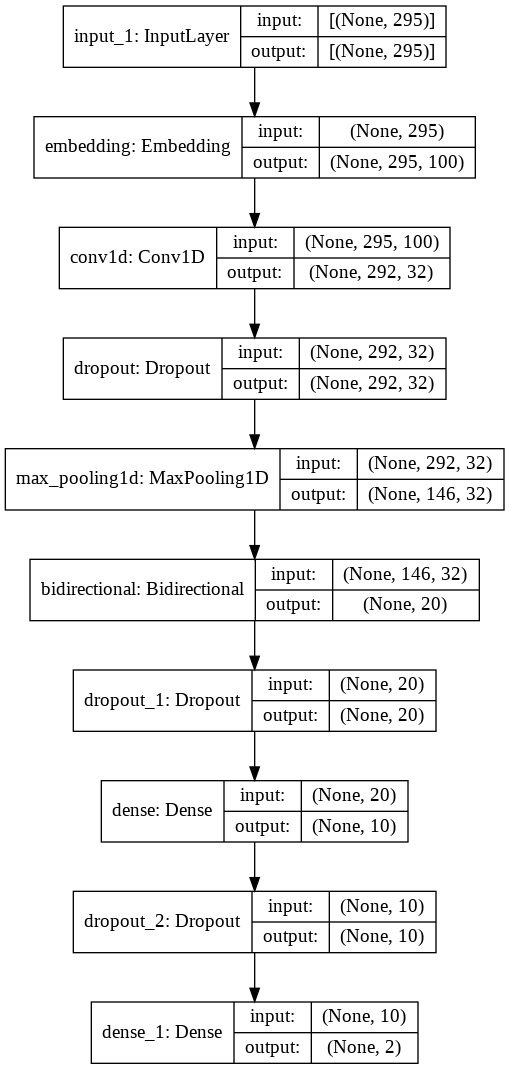

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-cp37-none-any.whl size=2657 sha256=5f510a64d672a7ec8416f56b3a0ced30da2958b7bd37dbca16dcd1cc7166bfd9
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras.utils


In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

y = Le.fit_transform(df['polarity'])




In [ ]:
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
from tensorflow.keras.utils import to_categorical
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
Y_train = to_categorical(Y_train.astype(int))
y_test = to_categorical(y_test.astype(int))


history=model.fit(X_train, Y_train,validation_data = (X_test,y_test),epochs =20, batch_size=32,callbacks=[rlrop])

Epoch 1/20
329/329 [==============================] - 115s 257ms/step - loss: 6.6775 - accuracy: 0.5015 - val_loss: 3.2234 - val_accuracy: 0.7291
Epoch 2/20
329/329 [==============================] - 83s 251ms/step - loss: 2.8100 - accuracy: 0.6111 - val_loss: 1.9159 - val_accuracy: 0.8024
Epoch 3/20
329/329 [==============================] - 82s 250ms/step - loss: 1.7061 - accuracy: 0.7742 - val_loss: 1.2033 - val_accuracy: 0.8684
Epoch 4/20
329/329 [==============================] - 82s 249ms/step - loss: 1.0585 - accuracy: 0.8685 - val_loss: 0.8062 - val_accuracy: 0.8822
Epoch 5/20
329/329 [==============================] - 82s 249ms/step - loss: 0.7168 - accuracy: 0.8957 - val_loss: 0.5857 - val_accuracy: 0.9009
Epoch 6/20
329/329 [==============================] - 81s 247ms/step - loss: 0.5204 - accuracy: 0.9165 - val_loss: 0.4627 - val_accuracy: 0.9064
Epoch 7/20
329/329 [==============================] - 83s 252ms/step - loss: 0.4006 - accuracy: 0.9298 - val_loss: 0.3890 - val_a

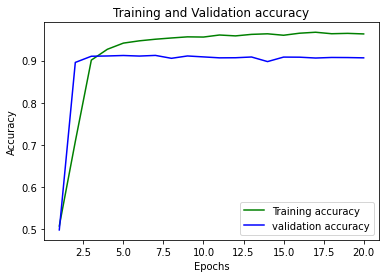

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

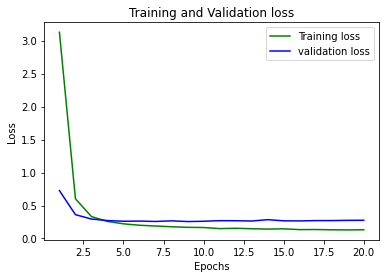

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_preds=model.predict(X_test)
y_preds=y_preds.round()

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report
sampleClassificationReport=classification_report(y_test,y_preds)
print(sampleClassificationReport)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2260
           1       0.93      0.88      0.90      2240

   micro avg       0.91      0.91      0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500
 samples avg       0.91      0.91      0.91      4500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_preds= np.argmax(y_preds, axis = 1)
y_test = np.argmax(y_test, axis =1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_preds)
print(cm)

[[2102  158]
 [ 267 1973]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_preds)
print('AUC: %.2f' % auc)

AUC: 0.91


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

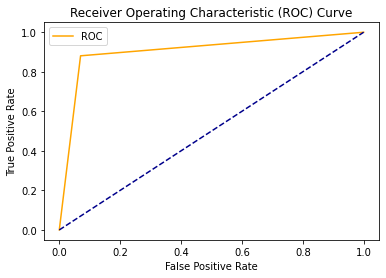

In [ ]:
plot_roc_curve(fpr, tpr)

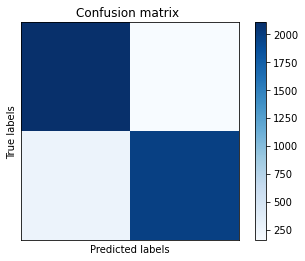

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_preds)
# or
# cm = np.array([[3708,    736],[687, 3869]])

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([3708], [736])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = KFold(n_splits = 5)

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# tf.config.experimental_run_functions_eagerly(True)

In [ ]:
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(X,y):        
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    y_train = to_categorical(y_train.astype(int))
    y_test = to_categorical(y_test.astype(int))

      
      
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=10)
    
    pred = model.predict(x_test)
    pred=pred.round()
    oos_y.append(y_test)
    oos_pred.append(pred) 
    print(metrics.accuracy_score(y_test, pred))
